<a href="https://colab.research.google.com/github/AlAminTanin56/NLP-for-review/blob/main/nlp_for_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.5 MB/s eta 0:00:00


In [3]:
# Initializing Environment and Loading Dataset

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

nltk.download('stopwords')
nltk.download('wordnet')


#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/googleplaystore_user_reviews.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
#Now Lets set dataset which collumns we are interested
df = pd.concat([df.Translated_Review, df.Sentiment], axis = 1)
df

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
...,...,...
64290,NaN,NaN
64291,NaN,NaN
64292,NaN,NaN
64293,NaN,NaN


In [5]:
#Now eleminate the nan value becasue they can affect our model
df.dropna(axis = 0, inplace = True)
df

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


In [6]:
df.shape
df

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


In [7]:
df.head(20)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [8]:
print(df['Sentiment'].unique())

['Positive' 'Neutral' 'Negative']


<Axes: xlabel='Sentiment'>

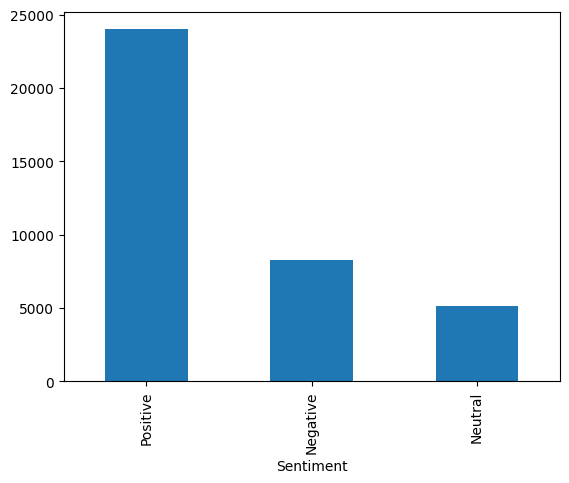

In [9]:
df.Sentiment.value_counts().plot(kind="bar")

In [10]:
df

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
...,...,...
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive


In [11]:
#Replace the Sentiment by Encoding, Positive=0, Negative = 1, Netural= 2
# Create a mapping dictionary
sentiment_mapping = {'Positive': 0, 'Negative': 1, 'Neutral': 2}

# Apply the mapping to create a new column with the text values
df['SentimentEncoded'] = df['Sentiment'].map(sentiment_mapping)
df

,Translated_Review,Sentiment,SentimentEncoded
0,I like eat delicious food. That's I'm cooking ...,Positive,0
1,This help eating healthy exercise regular basis,Positive,0
3,Works great especially going grocery store,Positive,0
4,Best idea us,Positive,0
5,Best way,Positive,0
...,...,...,...
64222,Most ads older many agents ..not much owner po...,Positive,0
64223,"If photos posted portal load, fit purpose. I'm...",Positive,0
64226,"Dumb app, I wanted post property rent give opt...",Negative,1
64227,I property business got link SMS happy perform...,Positive,0


In [12]:
df.Translated_Review

0        I like eat delicious food. That's I'm cooking ...
1          This help eating healthy exercise regular basis
3               Works great especially going grocery store
4                                             Best idea us
5                                                 Best way
                               ...                        
64222    Most ads older many agents ..not much owner po...
64223    If photos posted portal load, fit purpose. I'm...
64226    Dumb app, I wanted post property rent give opt...
64227    I property business got link SMS happy perform...
64230    Useless app, I searched flats kondapur, Hydera...
Name: Translated_Review, Length: 37427, dtype: object

In [13]:
text = df.Translated_Review

#Preprocess the feedbacks
stopwords_set = set(nltk_stopwords.words('english'))

# Convert the stopwords set to a list
stopwords_list = list(stopwords_set)


def preprocess(text):
     # Convert the input to a string, in case it's not already
    user_feedback = str(text)

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Remove non-alphabetic characters and convert to lower case
    user_feedback = re.sub(r'[^a-zA-Z\s]', '', user_feedback.lower())

    # Tokenize the text
    words = user_feedback.split()

    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_set]

    # Convert the stopwords set to a list
    stopwords_list = list(words)

    # Join the words back into a single string
    user_feedback = ' '.join(stopwords_list)

    return user_feedback

# Apply the preprocess function to each feedback
# Assume 'feedbacks' is your list of feedbacks
processed_feedbacks = [preprocess(feedback) for feedback in text]




# Initialize TF-IDF Vectorizer with stop words
vectorizer = TfidfVectorizer(stop_words=stopwords_list)
# Fit and transform preprocessed feedbacks into TF-IDF vectors
X = vectorizer.fit_transform(processed_feedbacks)

In [14]:
# then assign the sentiment column in the dataset to a new variable called 'y'
y = df.Sentiment

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (29941, 20719)
Shape of x_test: (7486, 20719)
Shape of y_train: (29941,)
Shape of y_test: (7486,)


<h2 style="color:yellow>SVM Classisifier</h2>

In [ ]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Evaluate the model on the test set
accuracy = svm_model.score(x_test, y_test)
print("SVM Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
joblib.dump(svm_model, "SVM_Model.pkl")

In [ ]:
#Now Fitting Random Forest Classifier to the Traning set
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 250, random_state = 42)
rf_model.fit(x_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred_rf = rf_model.predict(x_test)

# Printing the classification report
from sklearn.metrics import classification_report
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))


In [ ]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [ ]:
# Calculate accuracy for SVM and Random Forest models
svm_accuracy = svm_model.score(x_test, y_test)
rf_accuracy = rf_model.score(x_test, y_test)

# Create a bar plot to visualize the performance
model_names = ['SVM', 'Random Forest']
accuracies = [svm_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
x = range(len(model_names))
width = 0.3

plt.bar(x, accuracies, width, label='Accuracy')
plt.xticks(x, model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Performance Comparison: Accuracy')
plt.ylim(0.85, 0.99)
plt.legend()
plt.show()


In [ ]:
num_classes = len(set(y_train))
print("Number of classes:", num_classes)

In [ ]:
# Save the rf_model model
joblib.dump(rf_model, 'rf_model.pkl')

In [ ]:
# # Initialize the TfidfVectorizer with max_features=1000
vectorizer = TfidfVectorizer(stop_words=stopwords_list)
X = vectorizer.fit_transform(processed_feedbacks)

# text = 'extremely negative poor'

# # Test the preprocess_text function
processed_review = preprocess(text)
print("well: ",processed_review)

# # Transform the preprocessed text into TF-IDF vectors
vectorized_text = vectorizer.transform([processed_review])
print("TF-IDF vectors: ", vectorized_text)

SVM_model = joblib.load("SVM_Model.pkl")

# # Predict using the trained Random Forest model
prediction = SVM_model.predict(vectorized_text)
print("Prediction: ", prediction)


In [ ]:
def predict_sentiment(text):
    """
    Predict sentiment for a single input text.
    """
    # Initialize the TfidfVectorizer with max_features=1000
    vectorizer = TfidfVectorizer(stop_words=stopwords_list)
    X = vectorizer.fit_transform(processed_feedbacks)
    # print("Vector: ", X)

    # Test the preprocess_text function
    processed_review = preprocess(text)
    print("Well: ",processed_review)

    # Transform the preprocessed text into TF-IDF vectors
    vectorized_text = vectorizer.transform([processed_review])
    # print("TF-IDF vectors: ", vectorized_text)

    # SVM_model = joblib.load("SVM_model.pkl")

    # Predict using the trained Random Forest model
    prediction = SVM_model.predict(vectorized_text)
    print("Prediction: ", prediction)


    return prediction


In [ ]:
# Test the predict_sentiment function with a single review
review = 'extremely slow and bad!'
print("Predictionss: ", predict_sentiment(review))




[6]:
￼
df.head()
[6]:
Translated_Review	Sentiment
0	I like eat delicious food. That's I'm cooking ...	Positive
1	This help eating healthy exercise regular basis	Positive
3	Works great especially going grocery store	Positive
4	Best idea us	Positive
5	Best way	Positive
[6]:
￼
df.head()
[6]:
Translated_Review	Sentiment
0	I like eat delicious food. That's I'm cooking ...	Positive
1	This help eating healthy exercise regular basis	Positive
3	Works great especially going grocery store	Positive
4	Best idea us	Positive
5	Best way	Positive#**Conculation**
#For NLP Naive Bayes classifier and Random Forest Classifier both are used. In this particular case Random Forest gives us better  result
